# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

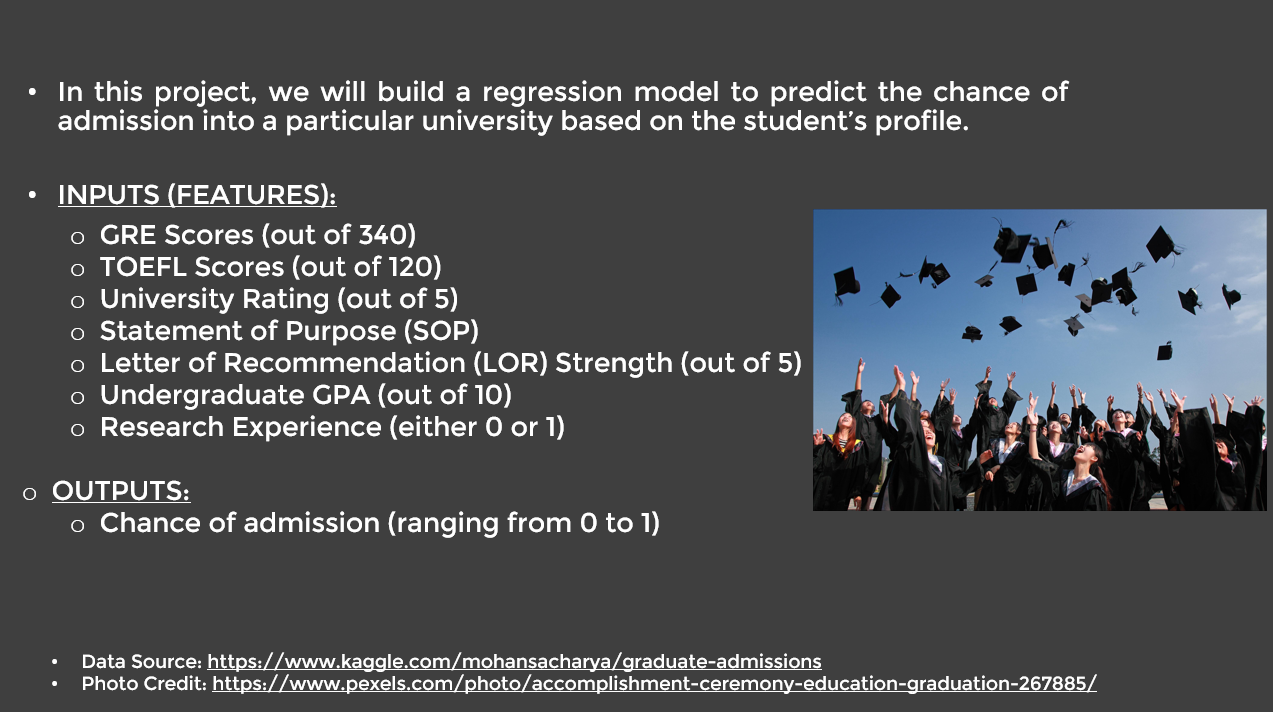

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd #used for data frame manipulation
import numpy as np #used for numerical analysis
import seaborn as sns #used for data visualization
import matplotlib.pyplot as plt #used for data visualization
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [2]:
# read the csv file 
admission_df = pd.read_csv('../data/Admission_Predict.csv')

In [3]:
admission_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df.count()

Serial No.           500
GRE Score            500
TOEFL Score          500
University Rating    500
SOP                  500
LOR                  500
CGPA                 500
Research             500
Chance of Admit      500
dtype: int64

In [5]:
# Let's drop the serial no.
#axis = 1 indicates drop the entire column
#inplace = True indicates that the column will be dropped in memory
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS

In [6]:
# checking the null values. If I have, I will drop or fill with mean values
admission_df.isnull().sum()



GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
# Check the dataframe information. How many elements we have with the data type for each of them
admission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
# Statistical summary of the dataframe
admission_df.describe()
#standart deviation is a measure off the dispertion away from the mean. 

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
# Grouping by University ranking 
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university
#it groups by university rating and brings the mean info for each column. For example, 
# the universities that has rating of 1, on average, students have a GRE Score of 304

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK #4: PERFORM DATA VISUALIZATION

array([[<Axes: title={'center': 'GRE Score'}>,
        <Axes: title={'center': 'TOEFL Score'}>,
        <Axes: title={'center': 'University Rating'}>],
       [<Axes: title={'center': 'SOP'}>,
        <Axes: title={'center': 'LOR '}>,
        <Axes: title={'center': 'CGPA'}>],
       [<Axes: title={'center': 'Research'}>,
        <Axes: title={'center': 'Chance of Admit'}>, <Axes: >]],
      dtype=object)

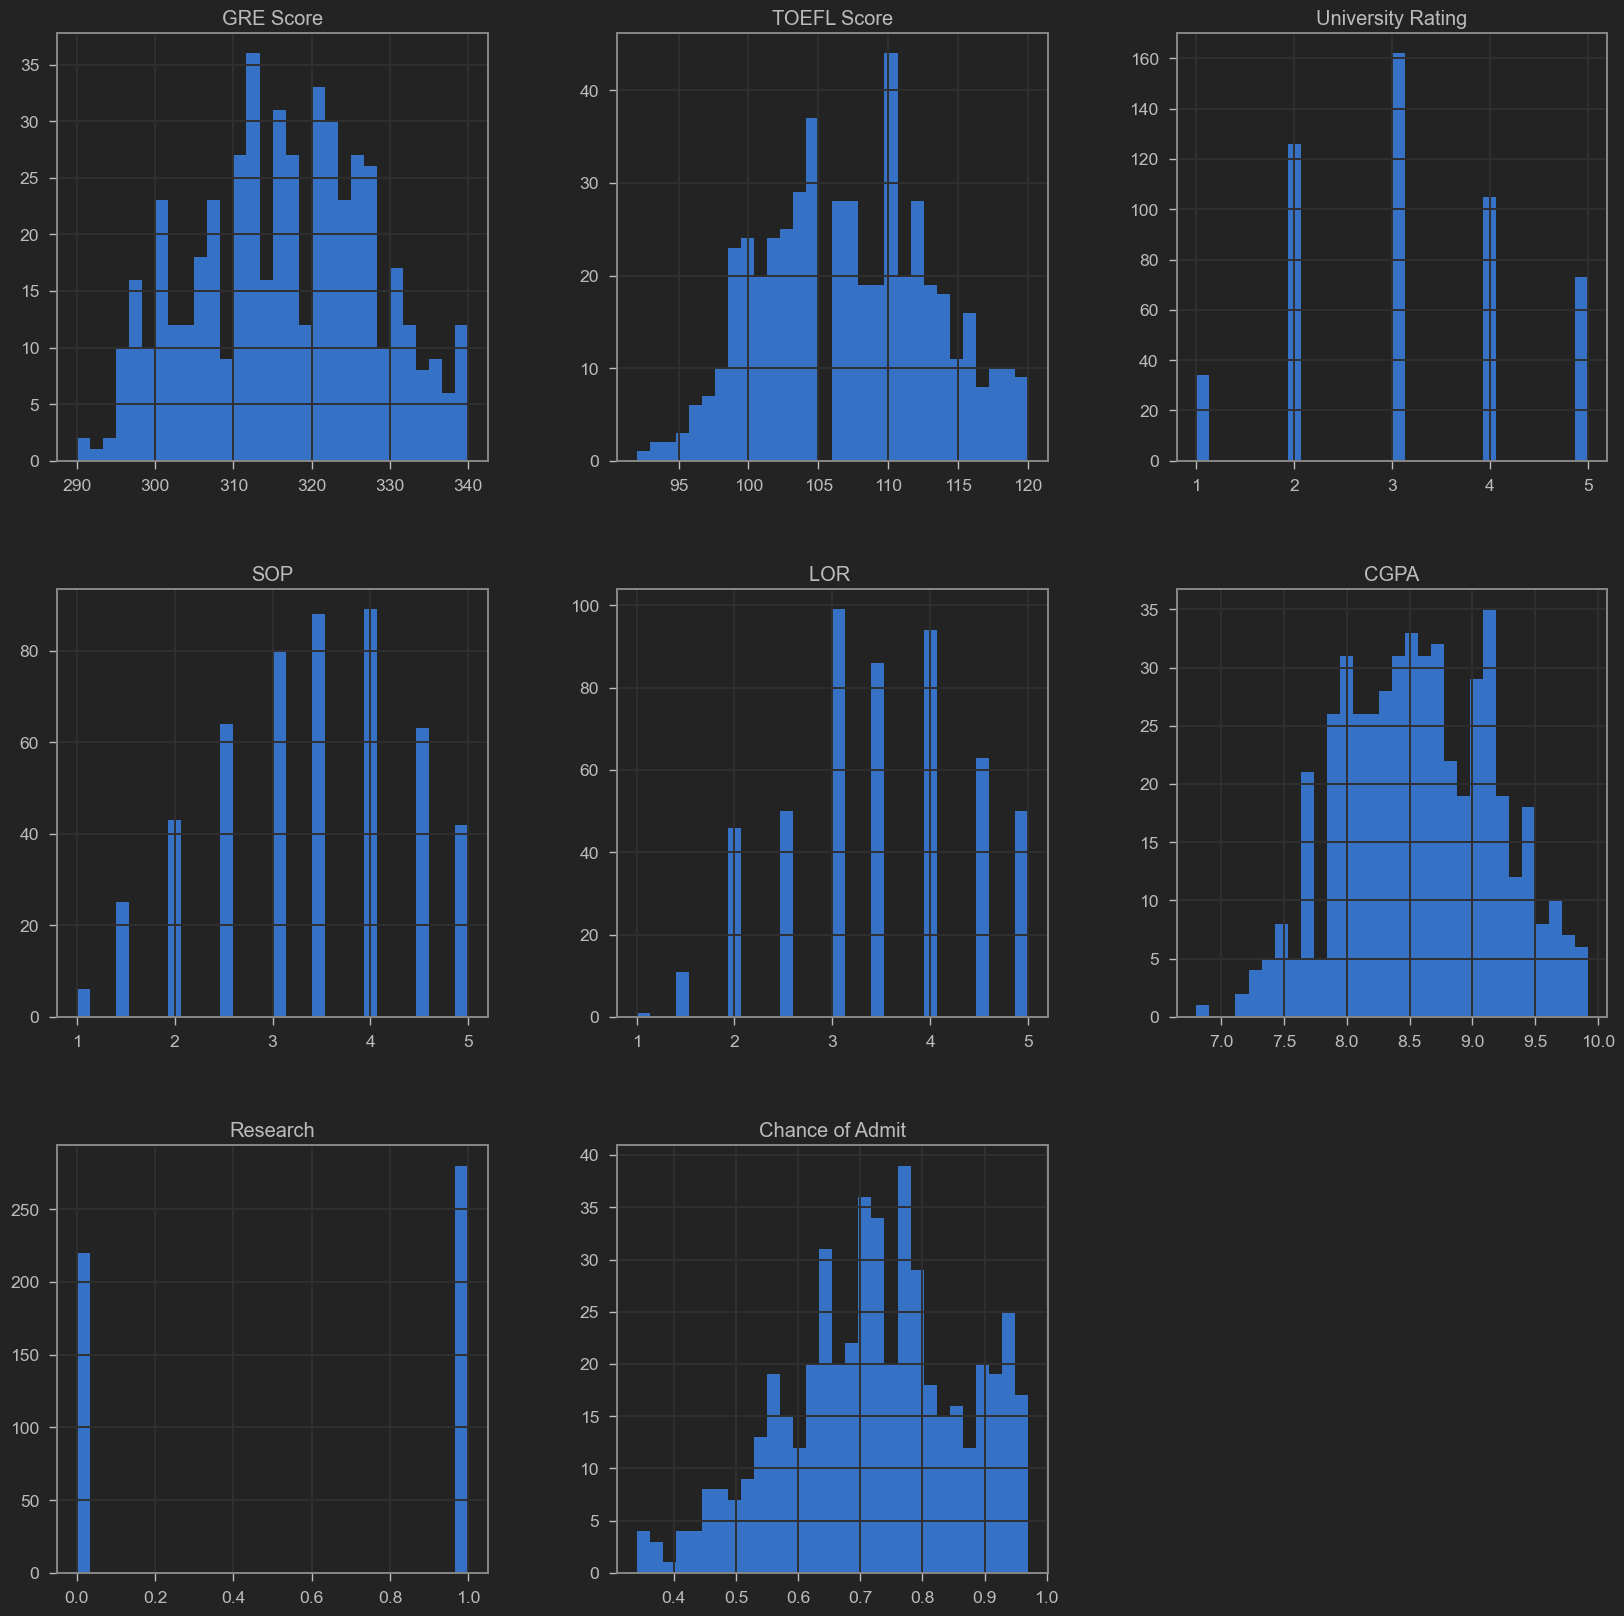

In [10]:
#plot the histogram, or distribuition of all our variables
admission_df.hist(bins = 30, figsize = (20, 20), color = 'b')
#distribution graph displays the spread of various outcomes in a dataset.
#From the distribution graphs bellow, you may notice that the ammount of students is higher in the middle of the graph,
#where the mean grades are.


c:\Users\leonv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


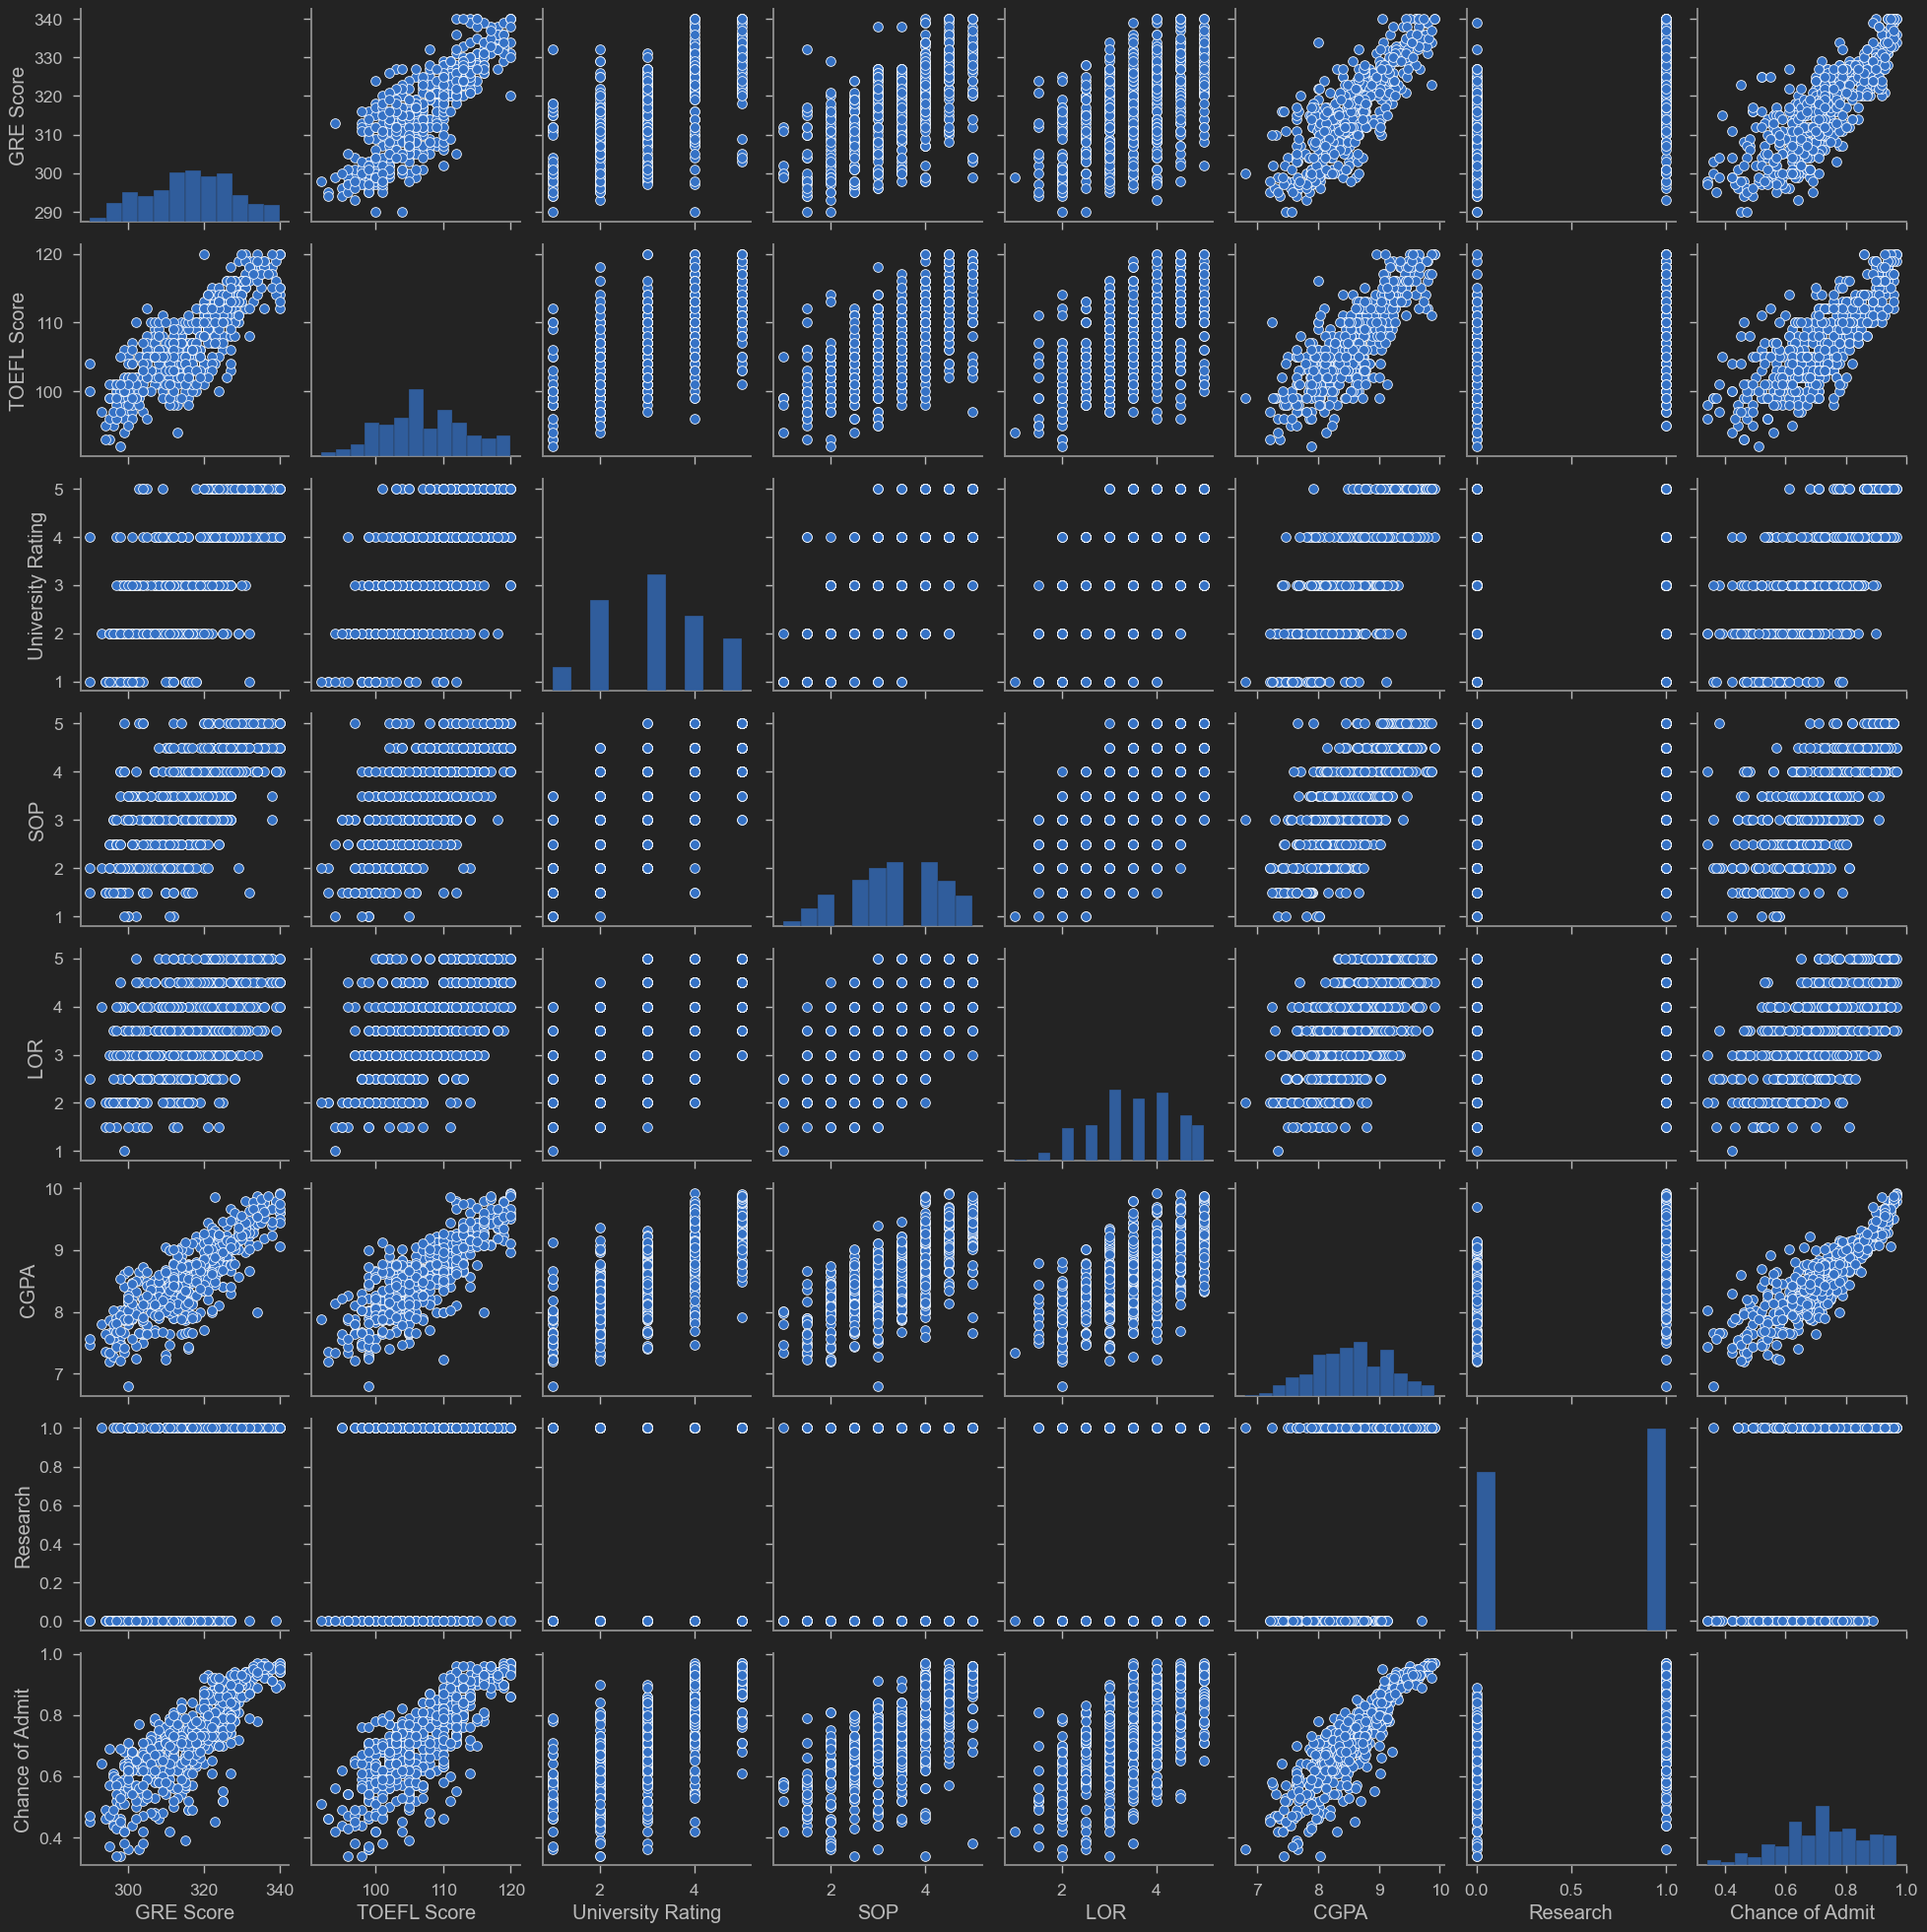

In [13]:
#You can take a look at all the relationship between every single variable or feature in the data frame
#Example: It seems that as the GRE score increases, the chances of admission also increases. The is a 
#positive correlation betweeen these two variables.
# admission_df_drop = admission_df.drop(columns = ['Serial No.'])
sns.pairplot(admission_df)

#Correlation vs causation
#There are three ways to describe the correlation between variables:
    #Positive correlation: As x increases, y increases
    #Negative correlation: As x increases, y decreases
    #No correlation: as x increases, y stays about the same or has no clear pattern

#Scatterplot shows relationships between different variables. Scatterplot are typically used for two variables
#for a set of data, although additional variables can be displayed.

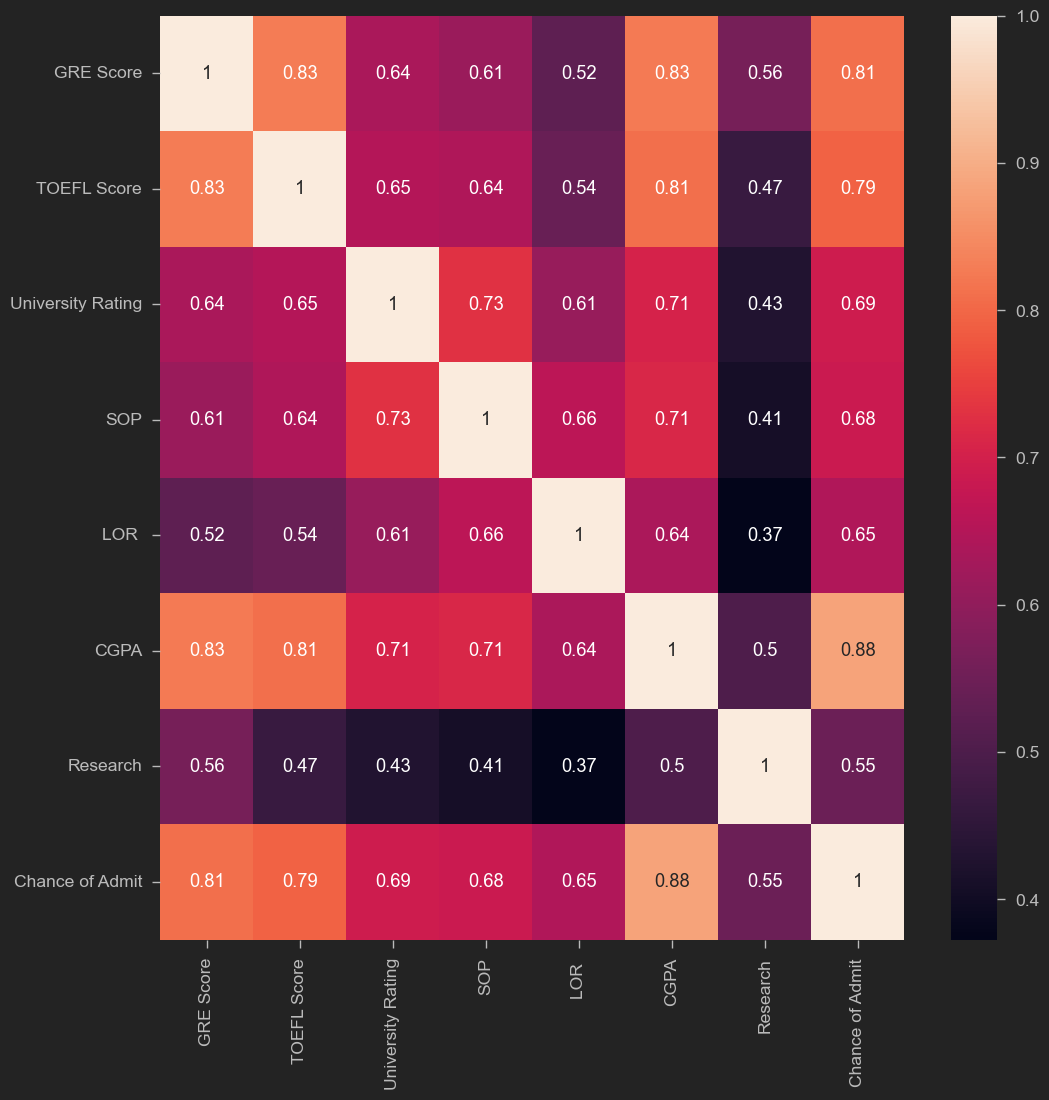

In [14]:
#plot the correlations. 
corr_matrix = admission_df.corr()
plt.figure(figsize = (12, 12))
sns.heatmap(corr_matrix, annot = True)
plt.show()
#Example: students that have a higher TOEFL score tend to have a higher GRE score. The are positevly related
#Heatmap use colors to compare categories in a data set. 
#They are mainly used to show relationships between two variables and used a system of color-coding to represent different values


# TASK #5: CREATE TRAINING AND TESTING DATASET

In [15]:
#take a look at the columns that I have
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [16]:
#I have to divide my data in inputs and outputs. Inputs I will call X and outputs I will call Y
#Basically the scores, ratings are the input and the Chance of admission is the target variable. 
x = admission_df.drop(columns = ['Chance of Admit'])

In [17]:
y = admission_df['Chance of Admit']

In [18]:
x.shape

(500, 7)

In [19]:
y.shape

(500,)

In [20]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [21]:
x = np.array(x)
y = np.array(y)

In [22]:
y = y.reshape(-1,1)
y.shape

(500, 1)

In [23]:
# scaling the data before training the model
#scale the data means to all the features to be "equal". I don't the model to be bias to some feature just
#because the range of that data is much larger.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#instantiate an object out of my class
scaler_x = StandardScaler()
#applying the fit transform method passing along the x value, with a new output x
x = scaler_x.fit_transform(x)

In [24]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [25]:
# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

# TASK #6: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

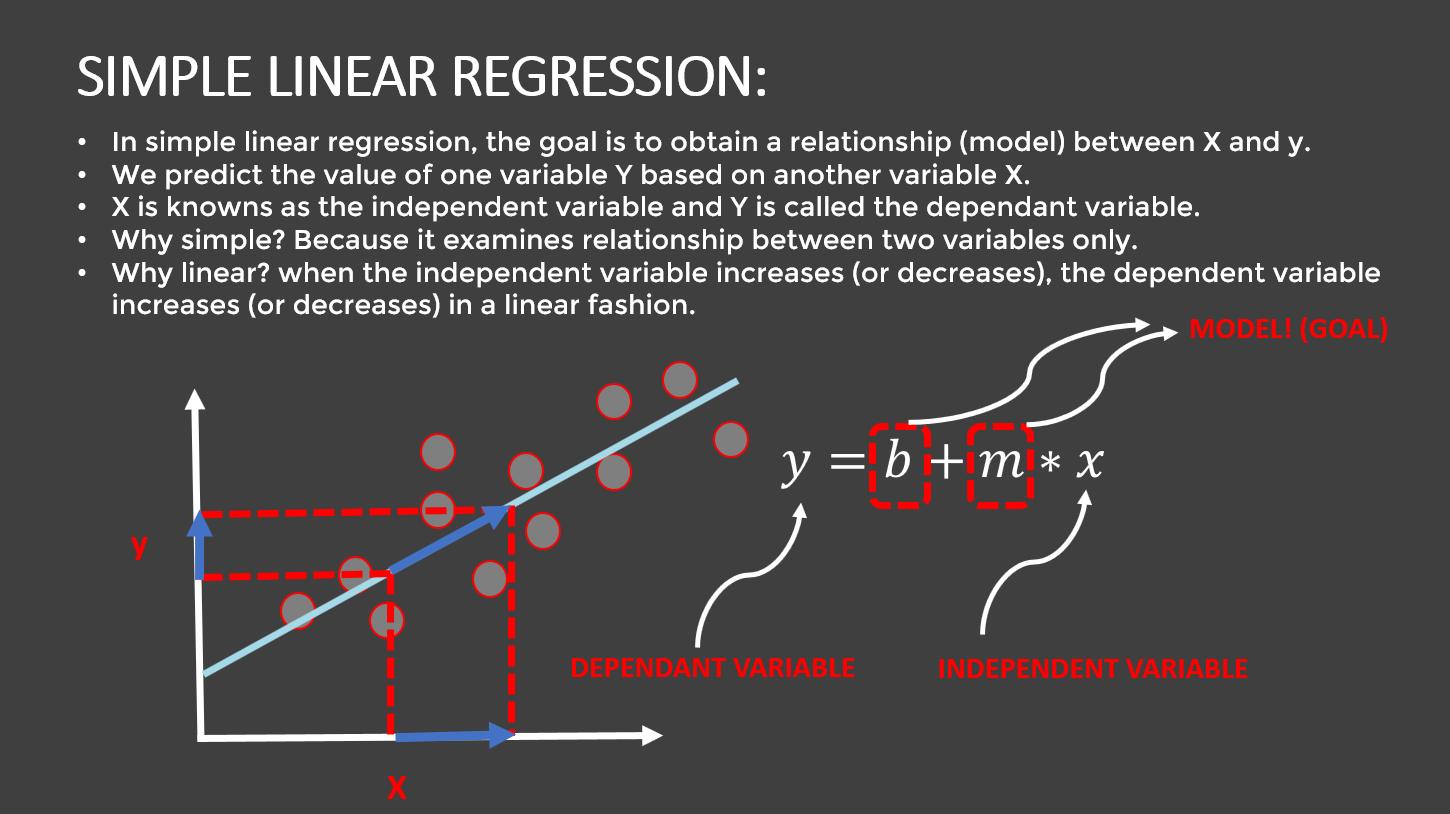

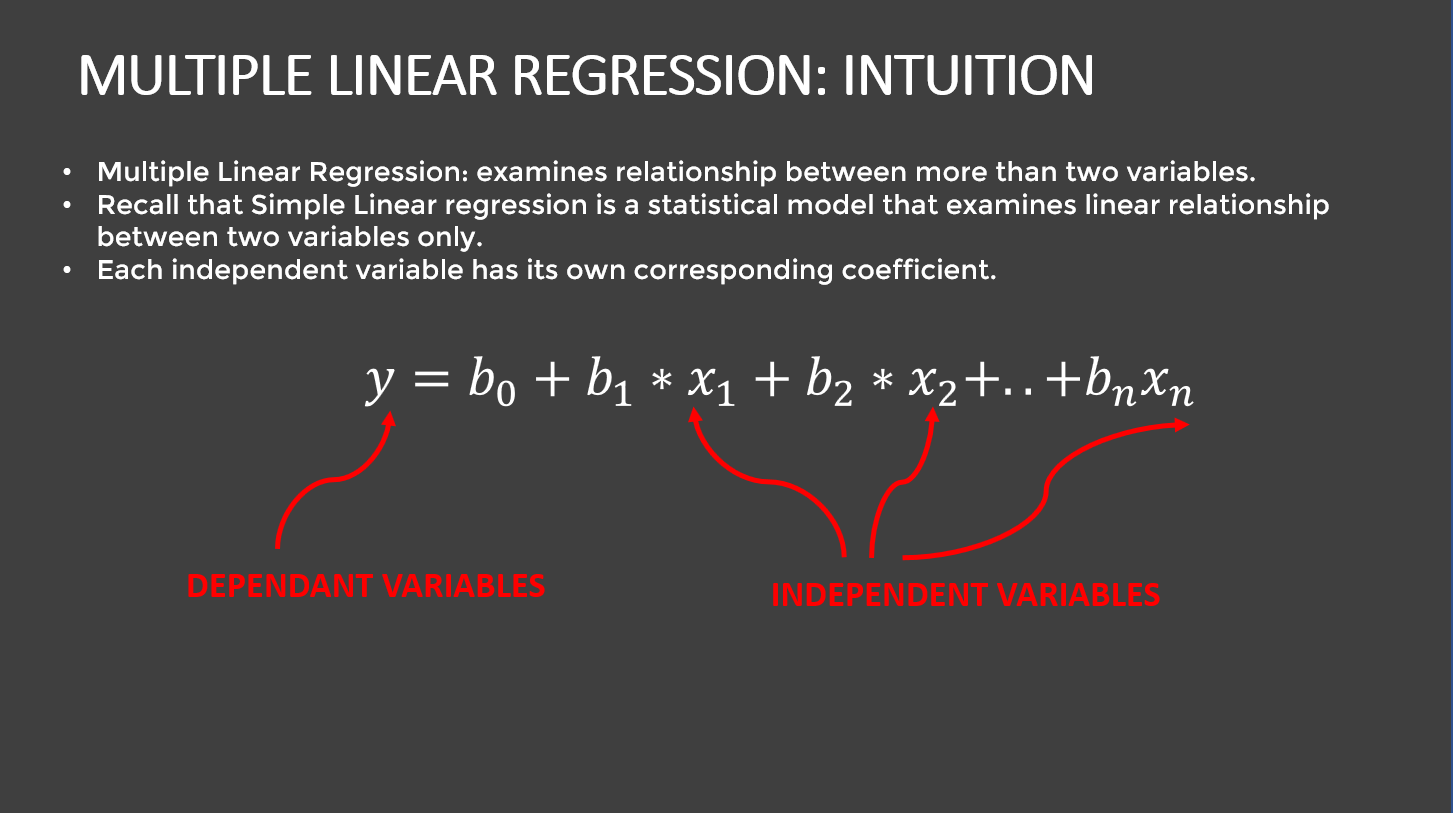

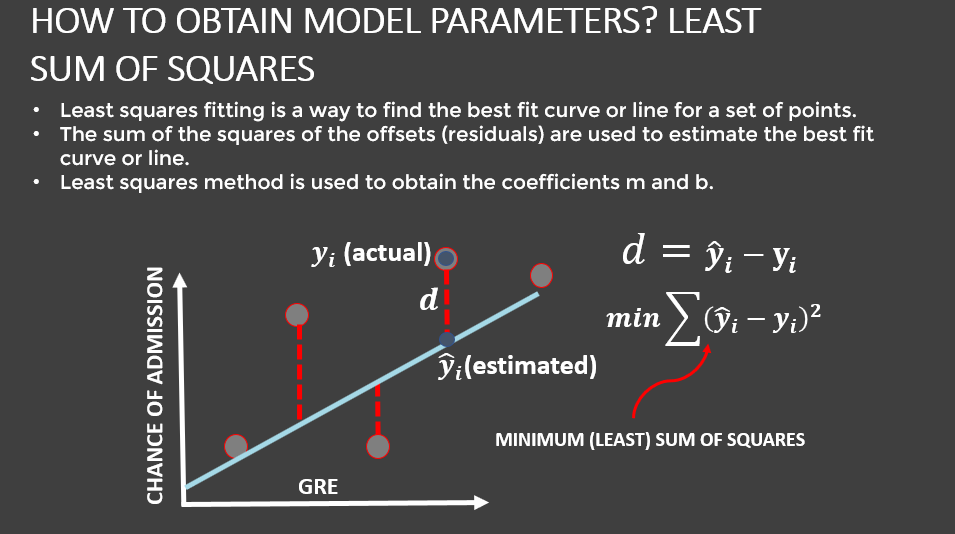

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [27]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train, y_train)

LinearRegression()

In [28]:
accuracy_LinearRegression = LinearRegression_model.score(x_test, y_test)
accuracy_LinearRegression

0.8224461593258522

# TASK #7: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

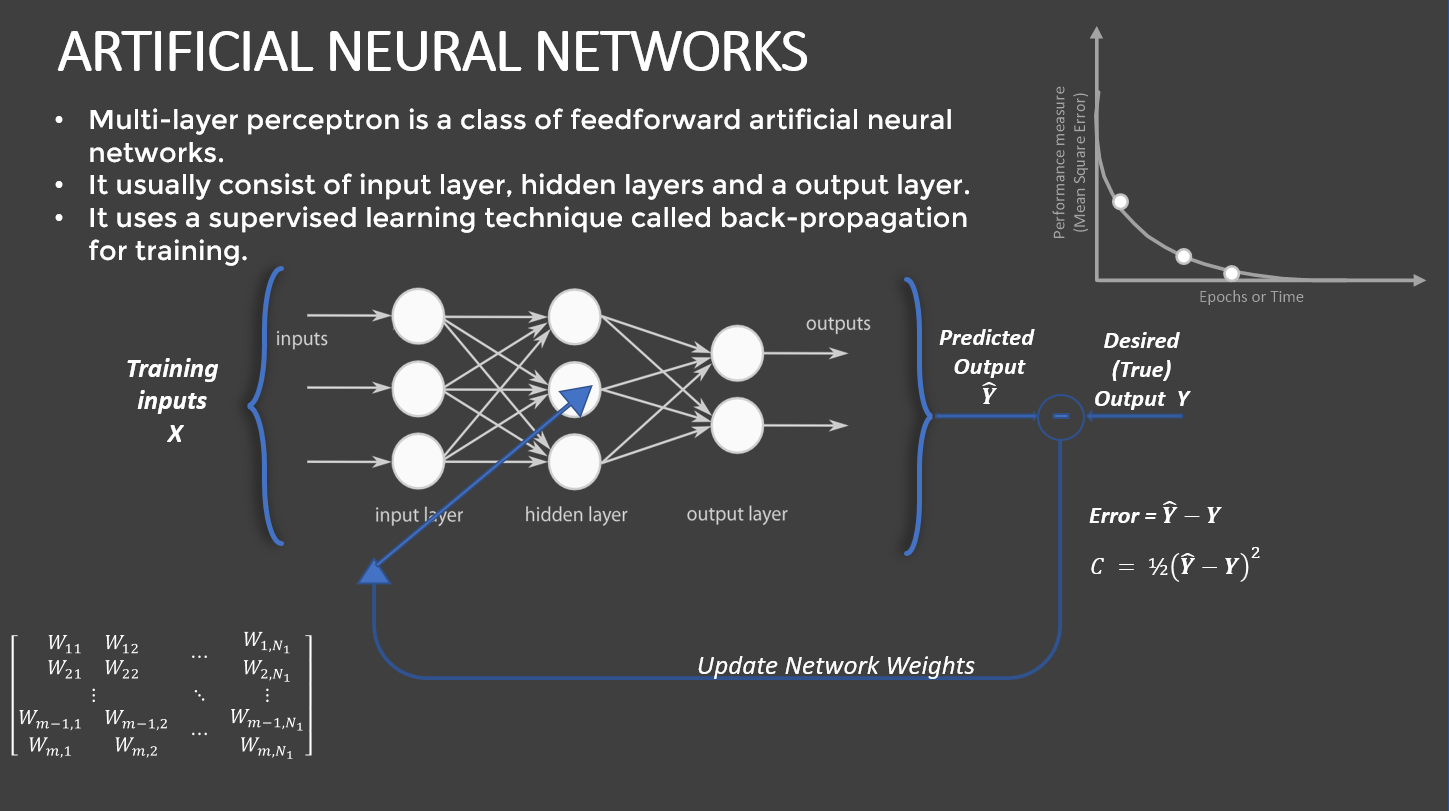

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [30]:
ANN_model = keras.Sequential()
#7 inputs, because I have 7 informations - GRE score, TOEFL, etc
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

#regresion test, so it should be linear
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

#mse = mean squared error
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [31]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [32]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
17/17 [==============================] - 1s 10ms/step - loss: 0.5890 - val_loss: 0.2269
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3219 - val_loss: 0.2416
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.3102 - val_loss: 0.2785
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2828 - val_loss: 0.2425
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2662 - val_loss: 0.2469
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2654 - val_loss: 0.2394
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2442 - val_loss: 0.2441
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2379 - val_loss: 0.2527
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.2312 - val_loss: 0.2165
Epoch 10/100
17/17 [==============================] - 0s 2ms/step - loss: 0.2435 - val_loss: 0.2654
Epoch 11

In [33]:
result = ANN_model.evaluate(x_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

3/3 [==============================] - 0s 2ms/step - loss: 0.2346
Accuracy : 0.7654159069061279


In [34]:
#progression of the network
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

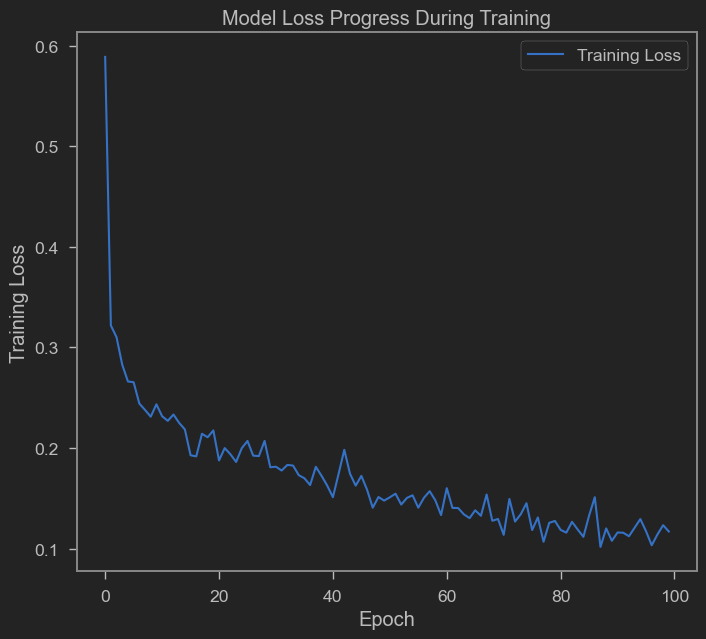

In [35]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

# TASK #8: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

In [36]:
# Decision tree builds regression or classification models in the form of a tree structure. 
# Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
# The final result is a tree with decision nodes and leaf nodes.
# Great resource: https://www.saedsayad.com/decision_tree_reg.htm

from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [37]:
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
accuracy_DecisionTree

0.6653251562802782

In [38]:
# Many decision Trees make up a random forest model which is an ensemble model. 
# Predictions made by each decision tree are averaged to get the prediction of random forest model.
# A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100, max_depth = 10)
RandomForest_model.fit(x_train, y_train)

c:\Users\leonv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=10)

In [39]:
accuracy_RandomForest = RandomForest_model.score(x_test, y_test) 
accuracy_RandomForest

0.8044234393810978

# TASK #9: UNDERSTAND VARIOUS REGRESSION KPIs

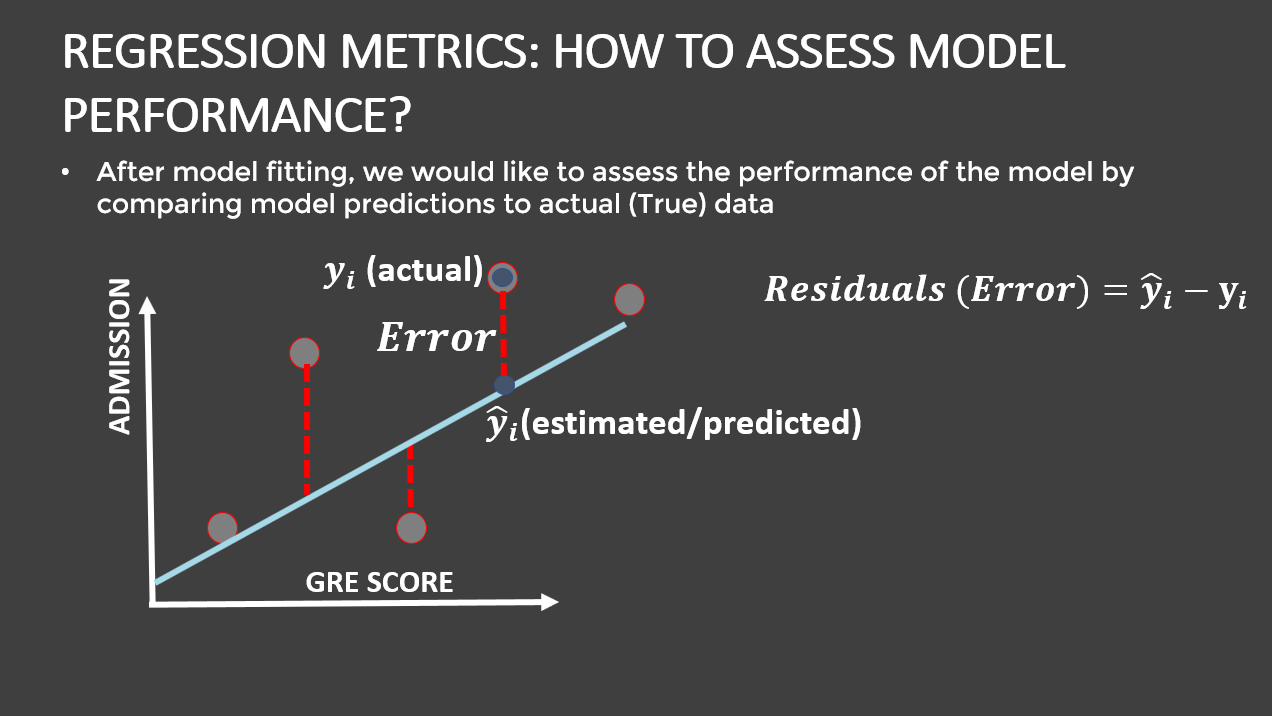

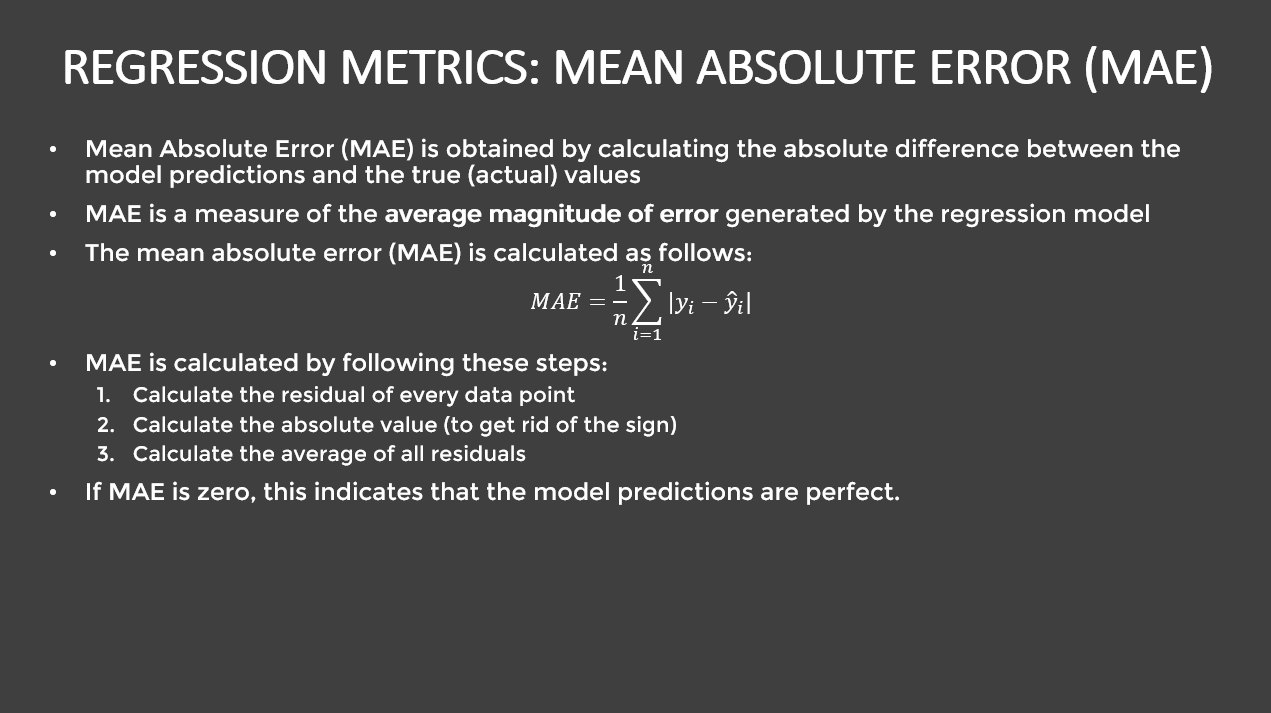

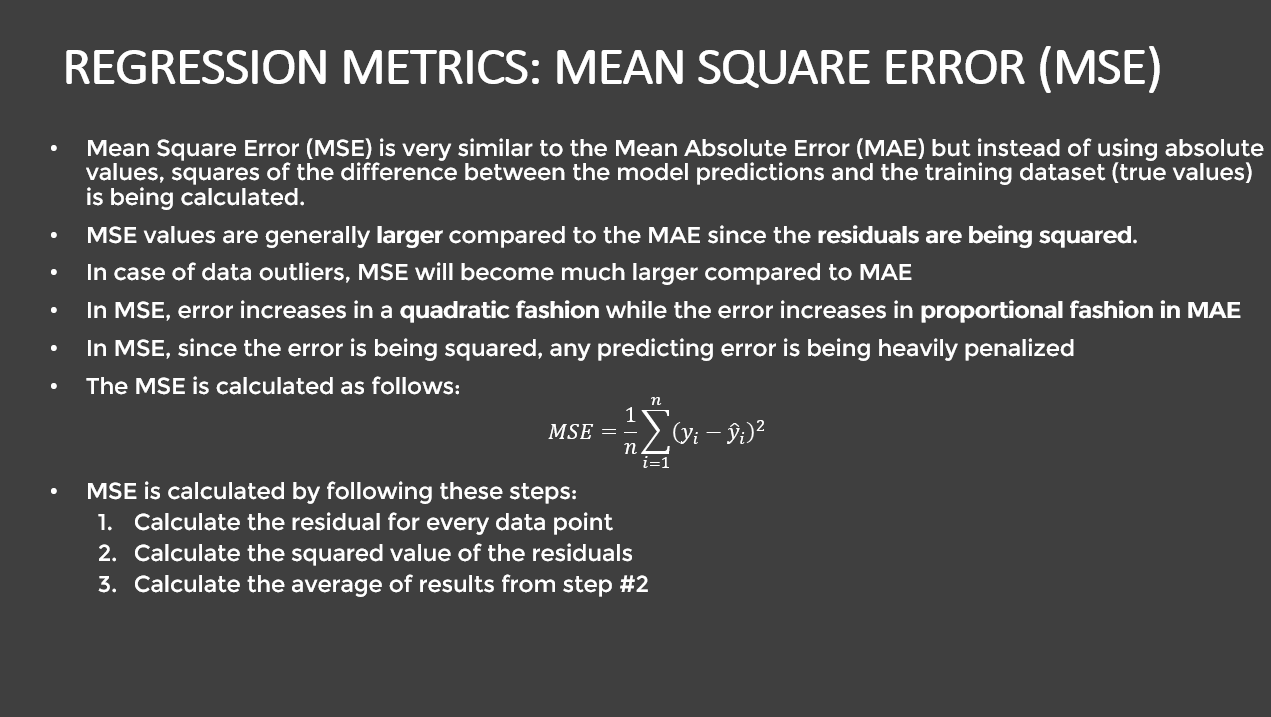

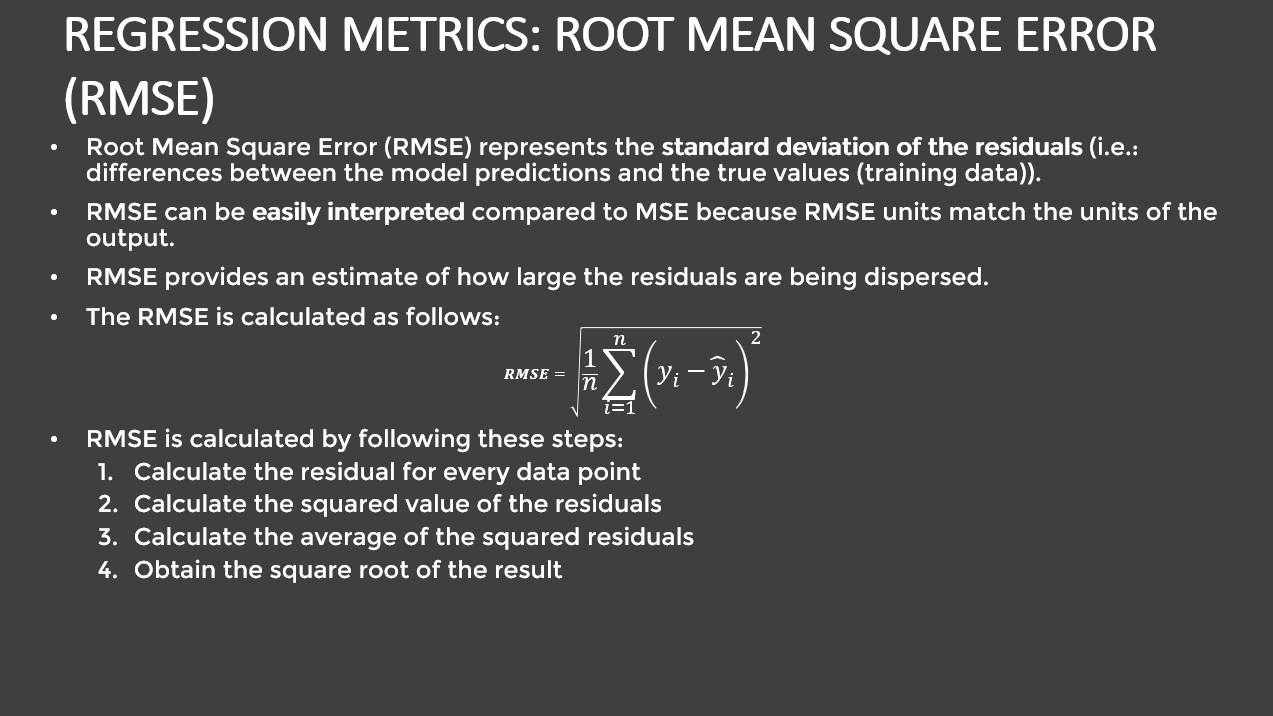

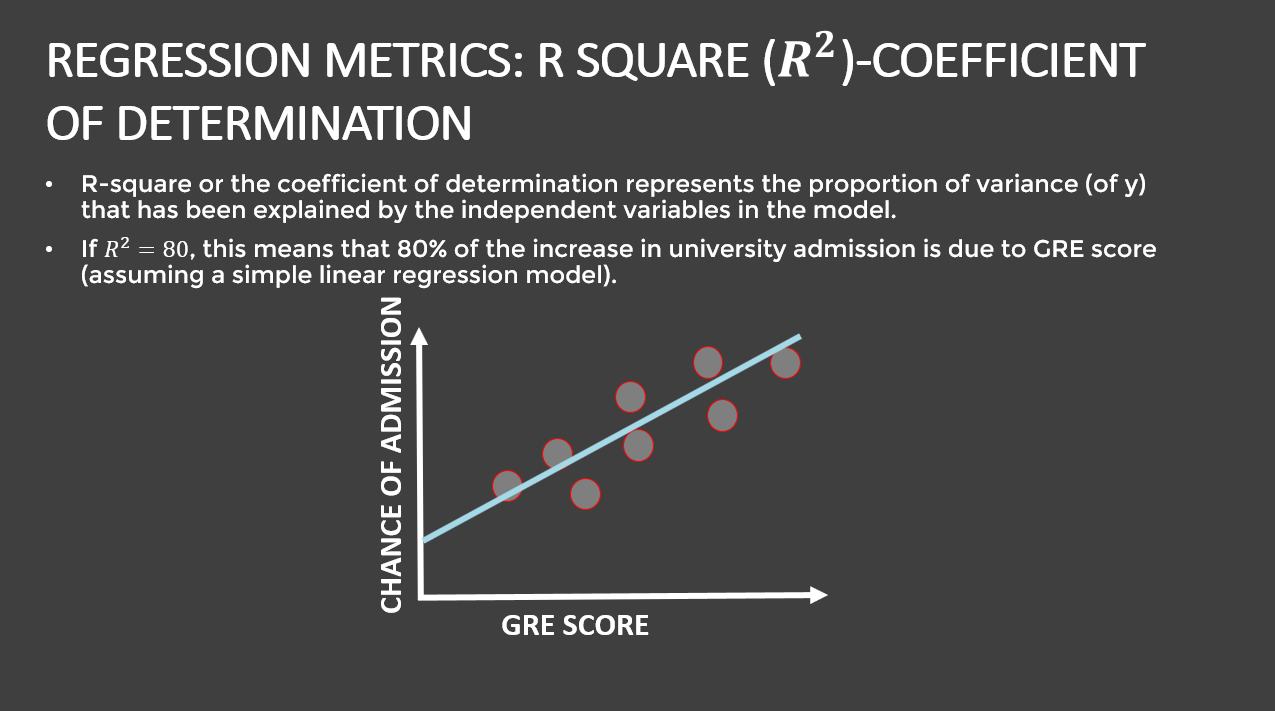

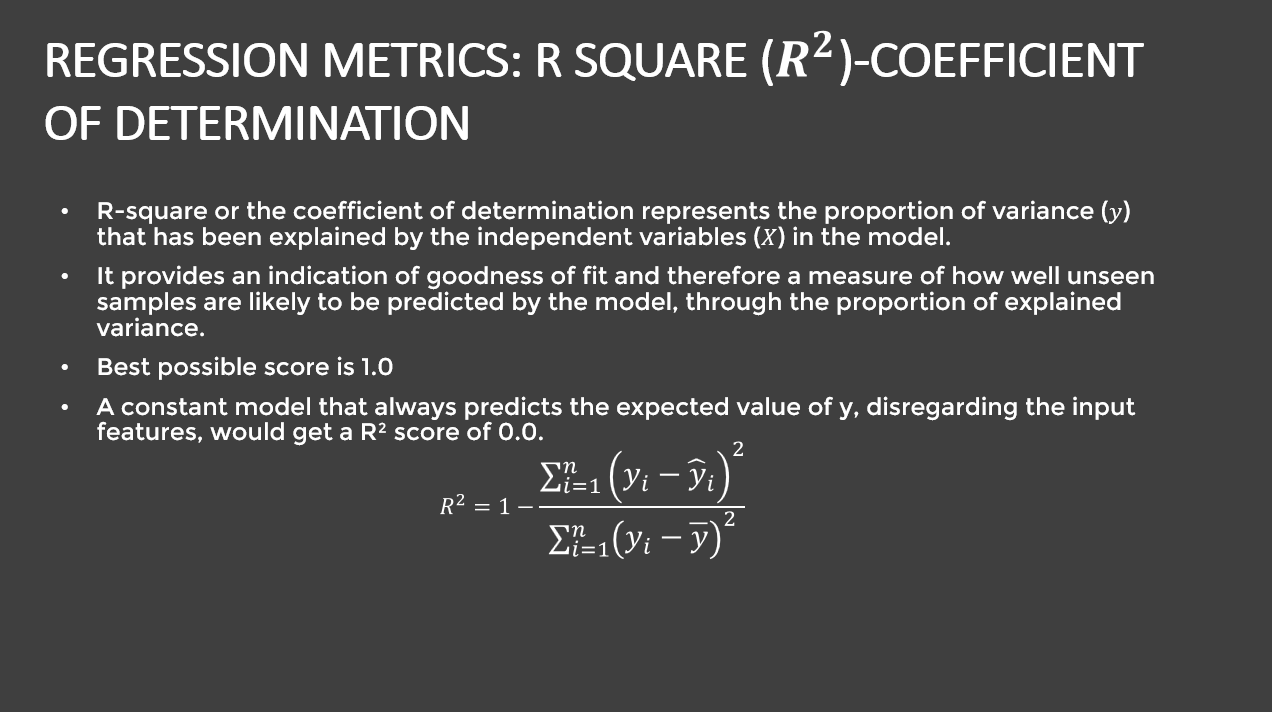

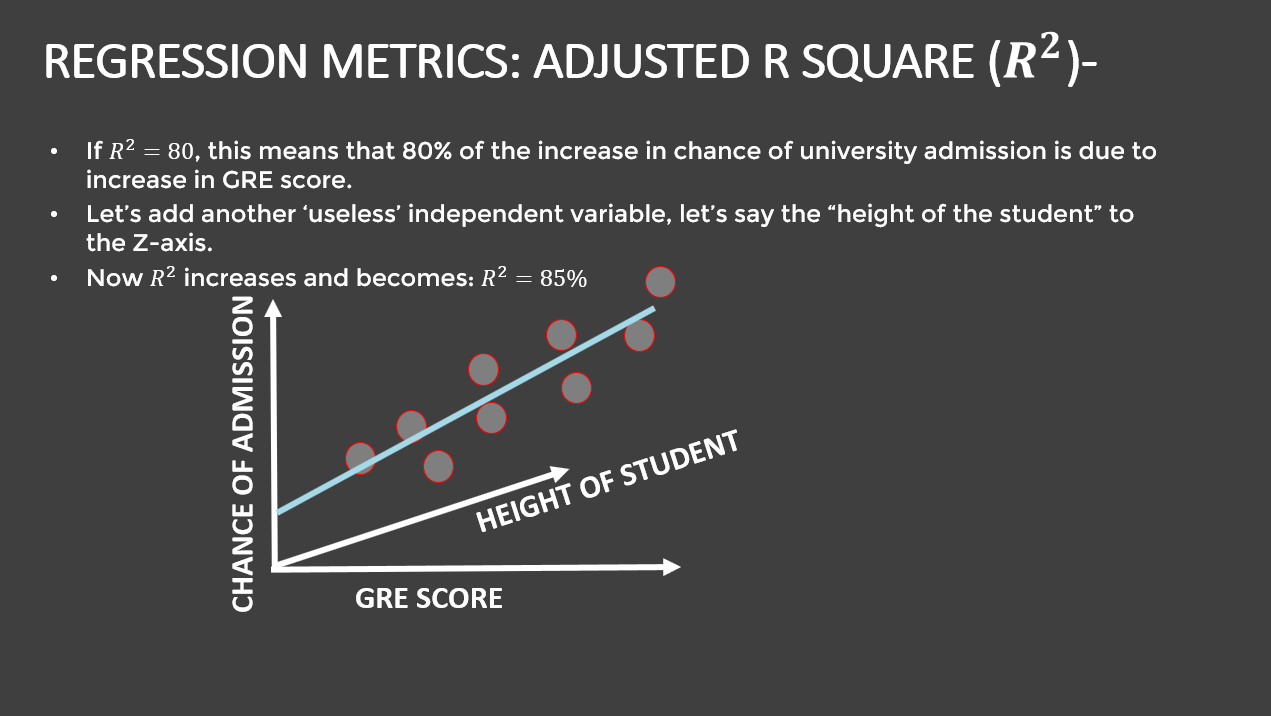

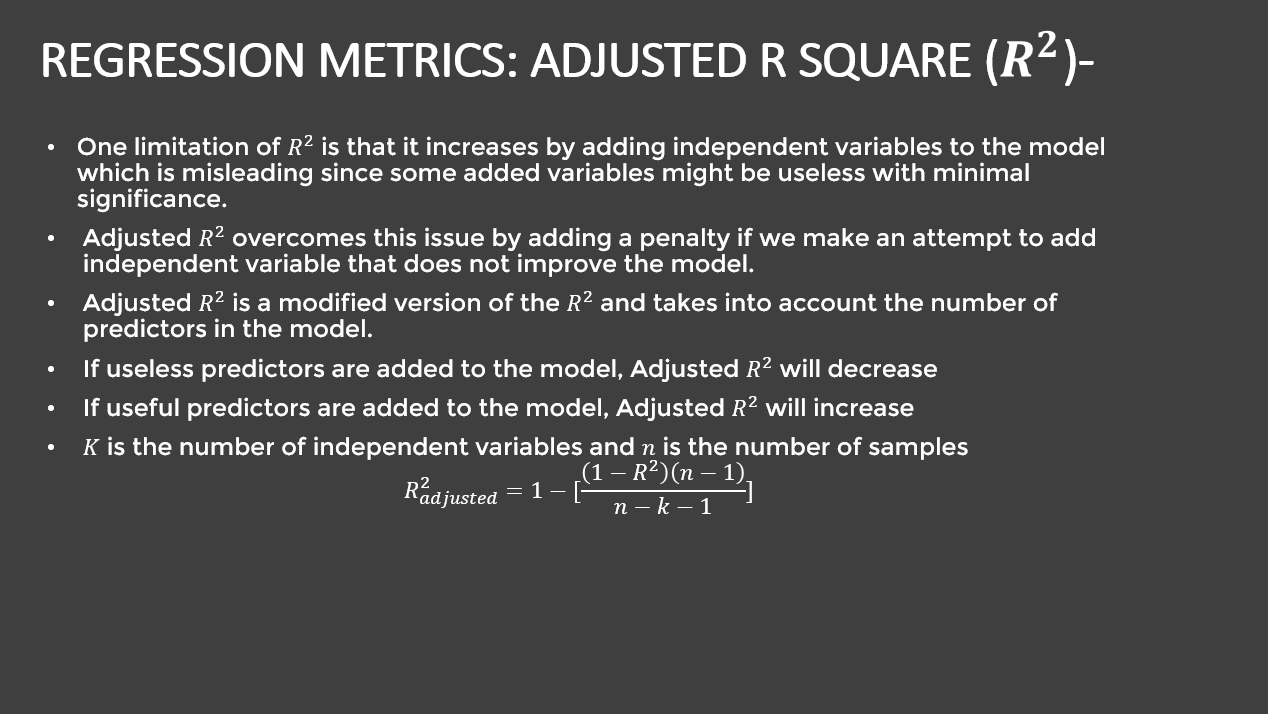

# TASK #10: CALCULATE REGRESSION MODEL KPIs

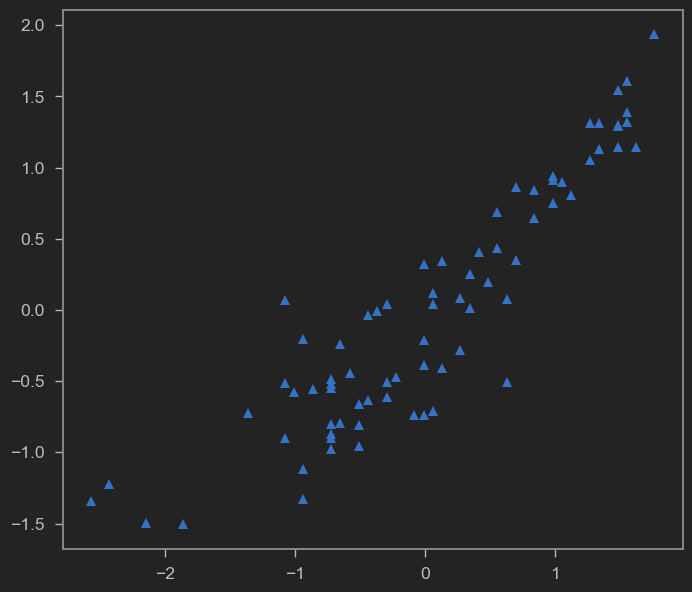

In [40]:
y_predict = LinearRegression_model.predict(x_test)
plt.plot(y_test, y_predict, '^', color = 'b')

In [41]:
#apply inverse transform to represent the data in its original units. 
y_predict_original = scaler_y.inverse_transform(y_predict)
y_test_original = scaler_y.inverse_transform(y_test)

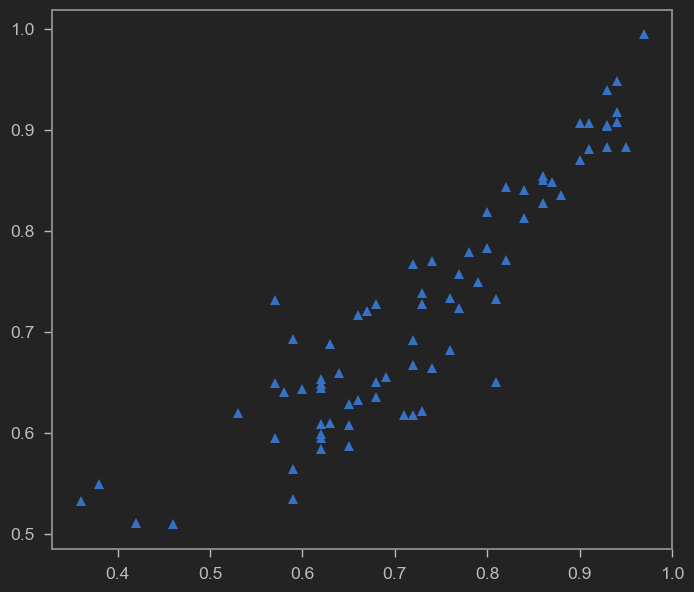

In [42]:
plt.plot(y_test_original, y_predict_original, '^', color='b')

In [43]:
k = x_test.shape[1]
n = len(x_test)
n

75

In [44]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),'.3f'))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2 = r2_score(y_test_original, y_predict_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2) 


RMSE = 0.059 
MSE = 0.0035184510979770376 
MAE = 0.04516925542940263 
R2 = 0.8224461593258521 
Adjusted R2 = 0.8038957580613889


# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS